In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Customer Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# replacing blank with '0' as tenure is '0'

In [5]:
df['TotalCharges']=df['TotalCharges'].replace(' ','0')


# Converting TotalCharges column object to float

In [6]:
df['TotalCharges']=df['TotalCharges'].astype(float)

# General Data Exploration

In [7]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.duplicated().sum().item()

0

In [9]:
df['customerID'].duplicated().sum().item()

0

# Replaced '0' and '1' values in the 'SeniorCitizen' column with 'No' and 'Yes' to improve data readability.

In [10]:
def cov(num):
    if num==1:
        return "yes"
    else:
        return "no"
df['SeniorCitizen']=df['SeniorCitizen'].apply(cov)

# Customer Churn Analysis

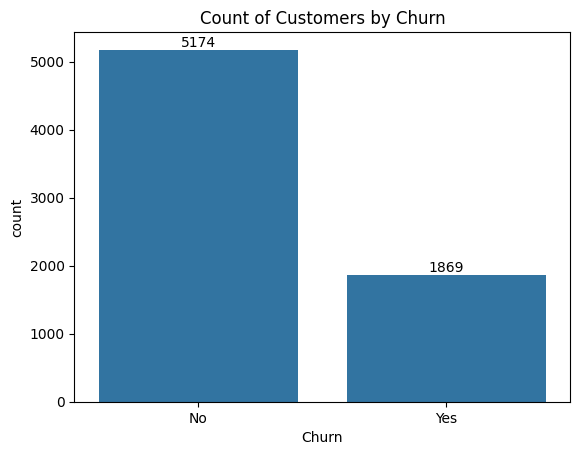

In [84]:
cnt=sns.countplot(x='Churn',data=df)
cnt.bar_label(cnt.containers[0])
plt.title('Count of Customers by Churn')
plt.show()

#This bar chart shows that the majority of customers (5174) did not churn, while 1869 customers did churn. Most customers remain loyal, but addressing the reasons for churn can help improve retention further.

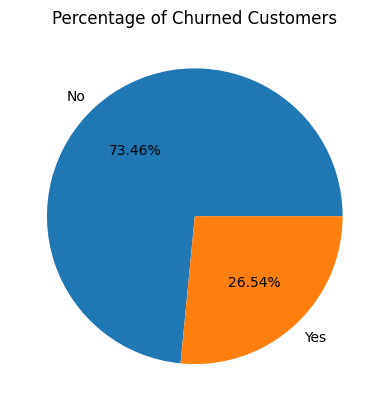

In [85]:
data=df.groupby('Churn').agg({'Churn':'count'})
plt.pie(data['Churn'],labels=data.index,autopct='%1.2f%%')
plt.title("Percentage of Churned Customers")
plt.show()

#from above pie chart we can conclude that 26.54% of our customers have churned out.

# Demographic Analysis

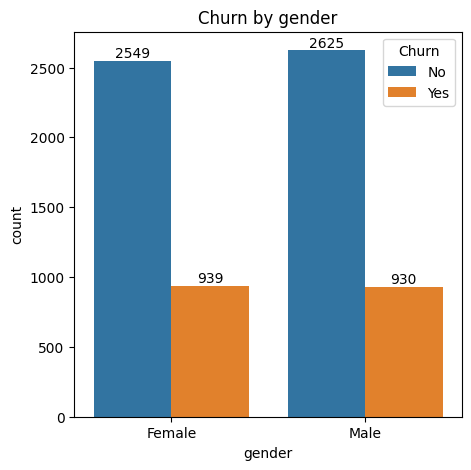

In [86]:
plt.figure(figsize=(5,5))
cnt=sns.countplot(x='gender',data=df,hue='Churn')
for container in cnt.containers:
    cnt.bar_label(container)
plt.title("Churn by gender")
plt.show()

#There is no significant difference in churn behavior between genders. The distribution of churn (Yes/No) is quite similar for both males and females.

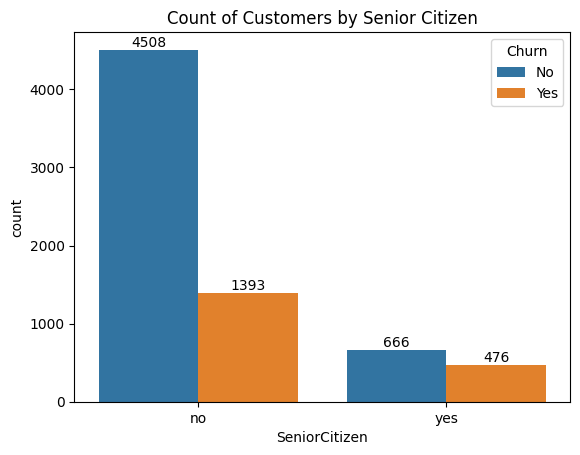

In [87]:
cnt=sns.countplot(x='SeniorCitizen',data=df,hue='Churn')
for container in cnt.containers:
    cnt.bar_label(container)
plt.title("Count of Customers by Senior Citizen")
plt.show()

#Senior citizens have a higher churn rate than other age groups.

# Subscription & Service Analysis

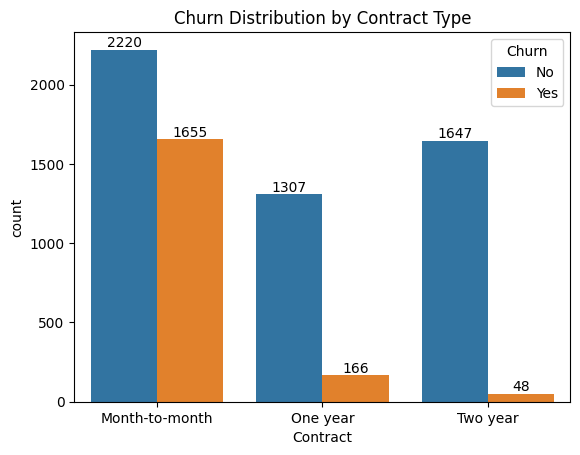

In [88]:
cnt=sns.countplot(x='Contract',data=df,hue='Churn')
for container in cnt.containers:
    cnt.bar_label(container)
plt.title('Churn Distribution by Contract Type')
plt.show()

#Customers on month-to-month contracts are more likely to churn, while those on longer-term contracts (one-year or two-year) show higher loyalty. This suggests that encouraging customers to switch to longer-term contracts could help reduce churn.

# Distribution of Customer Tenure

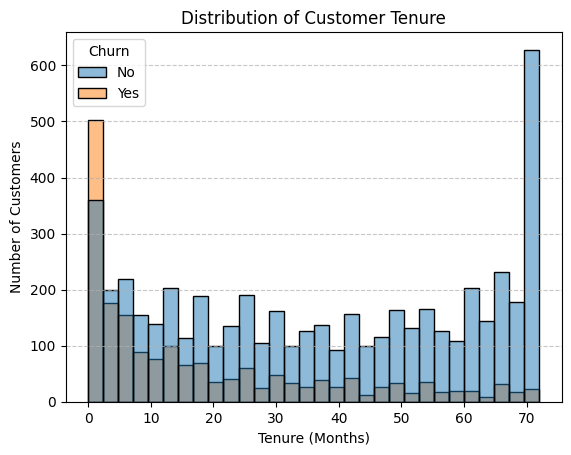

In [15]:
sns.histplot(x='tenure',data=df, bins=30,hue='Churn')
plt.xlabel("Tenure (Months)")
plt.ylabel("Number of Customers")
plt.title("Distribution of Customer Tenure")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Customers with shorter tenures (less than 10 months) are more likely to churn, while those with longer tenures (above 60 months) tend to stay. Efforts should focus on retaining new customers early in their tenure.

# Payment & Billing Analysis

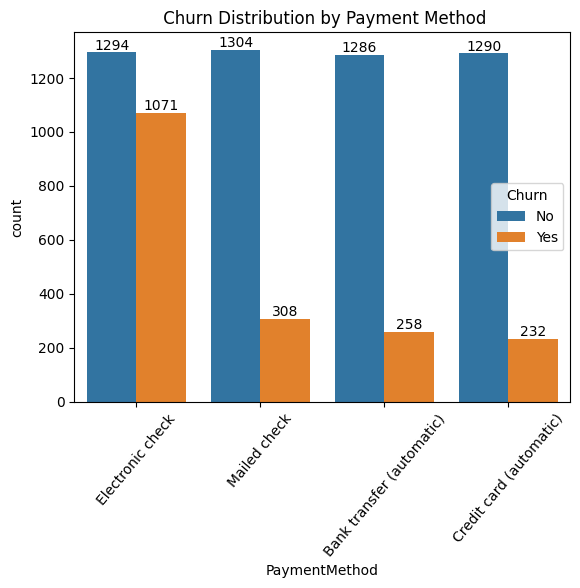

In [89]:
cnt=sns.countplot(x='PaymentMethod',data=df,hue='Churn')
for container in cnt.containers:
    cnt.bar_label(container)
plt.xticks(rotation=50)
plt.title(' Churn Distribution by Payment Method')
plt.show()

#Customers using electronic checks have the highest churn rates, while those using automatic payments like bank transfers or credit cards churn less. Encouraging automatic payment methods can help retain customers.

# Impact of Internet Service Type on Customer Churn

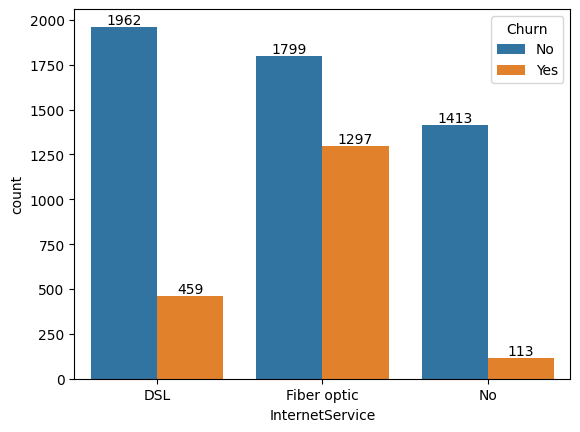

In [93]:
cnt=sns.countplot(x='InternetService',data=df,hue='Churn')
for container in cnt.containers:
    cnt.bar_label(container)
plt.show()

#Customers with Fiber Optic internet are more likely to churn compared to DSL or no internet. Improving Fiber Optic service could help reduce churn rates.

# Customer Support & Satisfaction

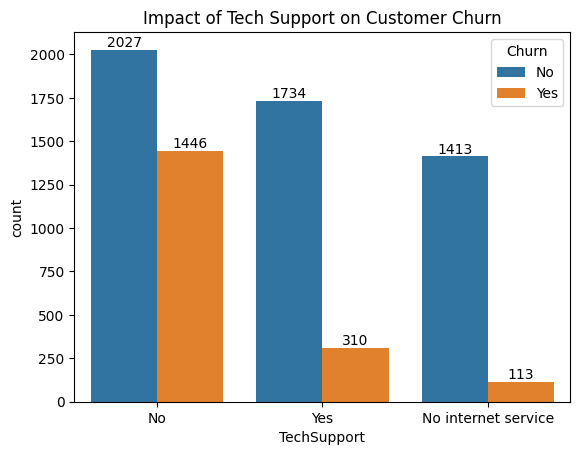

In [91]:
cnt=sns.countplot(x='TechSupport',data=df,hue='Churn')
for container in cnt.containers:
    cnt.bar_label(container)
plt.title("Impact of Tech Support on Customer Churn")
plt.show()

#Customers without tech support have higher churn rates, while those with tech support are more likely to stay. Providing reliable tech support can help reduce churn.